# Introduction 

## Motivation

In this tutorial, the topic of feature selection is explained on a chemical dataset containing information about the melting point (MP) of several molecules. Based on the structure of the molecule, several hundred features have been extracted, however some of them do not contain any useful information on the MP of molecules. 

When dealing with machine learning algorithms such as linear regression or decision trees for regression problems, we are eager to only use features that are important to the target variable and leave out unimportant ones, as they introduce bias to the model performance. In order to find those features that are useful to the target variable, we use several feature selection algorithms provided by the `sklearn` library. Then we train a multilinear regression model and a decision tree on both, on all features and the selected ones in order to see whether and how much the model performance has increased. 

## Feature selection

* Types of feature selction
* Advantages and disadvanteges
* Sources

# Implemenation

## Import modules 

In [50]:
# Standard
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Feature slection
from sklearn.feature_selection import mutual_info_regression

# Performance estimator 
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Set plotstyle for fancier plots
plt.style.use('seaborn')

## Data import and preprocssing

In order to import the data, we use pandas `read_csv` function. To get a sneak peak of the dataframe, we just call the `head()` method. 

In [67]:
df=pd.read_csv('data/mp_data_desc.csv')
df.head(n=2)

,Unnamed: 0,compound,CSID,MP_Kelvin,SMILES,rdk_smiles,BalabanJ,BertzCT,Chi0,Chi0n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,0,(-)-levonorgestrel,12560.0,509.15,O=C4\C=C3/[C@@H]([C@H]2CC[C@]1([C@@H](CC[C@]1(...,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,1.671196,597.453052,16.242276,14.183525,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746050
1,1,"(1E,4E)-1,5-Di(2-naphthyl)-1,4-pentadien-3-one",4523376.0,516.65,O=C(\C=C\c2ccc1c(cccc1)c2)\C=C\c2ccc1c(cccc1)c2,O=C(/C=C/c1ccc2ccccc2c1)/C=C/c1ccc2ccccc2c1,1.489886,1057.599472,17.769374,14.300553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400873


As there are some columns that we do not need for further research, we use the `drop()` method in order to get rid of them. Remebmer to set `axis=1` to drop actual columns, as the default `axis=0` drops rows. 

In [65]:
dataset_clean = df.drop(['Unnamed: 0', 'compound', 'CSID', 'SMILES', 'rdk_smiles'], axis=1)

In [66]:
dataset_clean.head()

,MP_Kelvin,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,509.15,1.671196,597.453052,16.242276,14.183525,14.183525,11.043772,9.478974,9.478974,8.395266,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746050
1,516.65,1.489886,1057.599472,17.769374,14.300553,14.300553,12.775990,8.656260,8.656260,6.282212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400873
2,360.90,2.181267,541.858095,12.087576,9.206315,9.206315,8.270857,5.326448,5.326448,3.625417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641274
3,461.15,2.258880,691.777798,14.535169,10.392675,10.392675,9.575387,5.825887,5.825887,4.063838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399765
4,463.15,2.084842,580.396040,13.664926,10.537213,10.537213,9.185872,5.843521,5.843521,4.017618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672316


In [68]:
# Get feature names for later identification
feature_names = dataset_clean.drop('MP_Kelvin', axis=1).columns

## Exploratory data analysis

In [70]:
dataset_clean.shape

(597, 201)

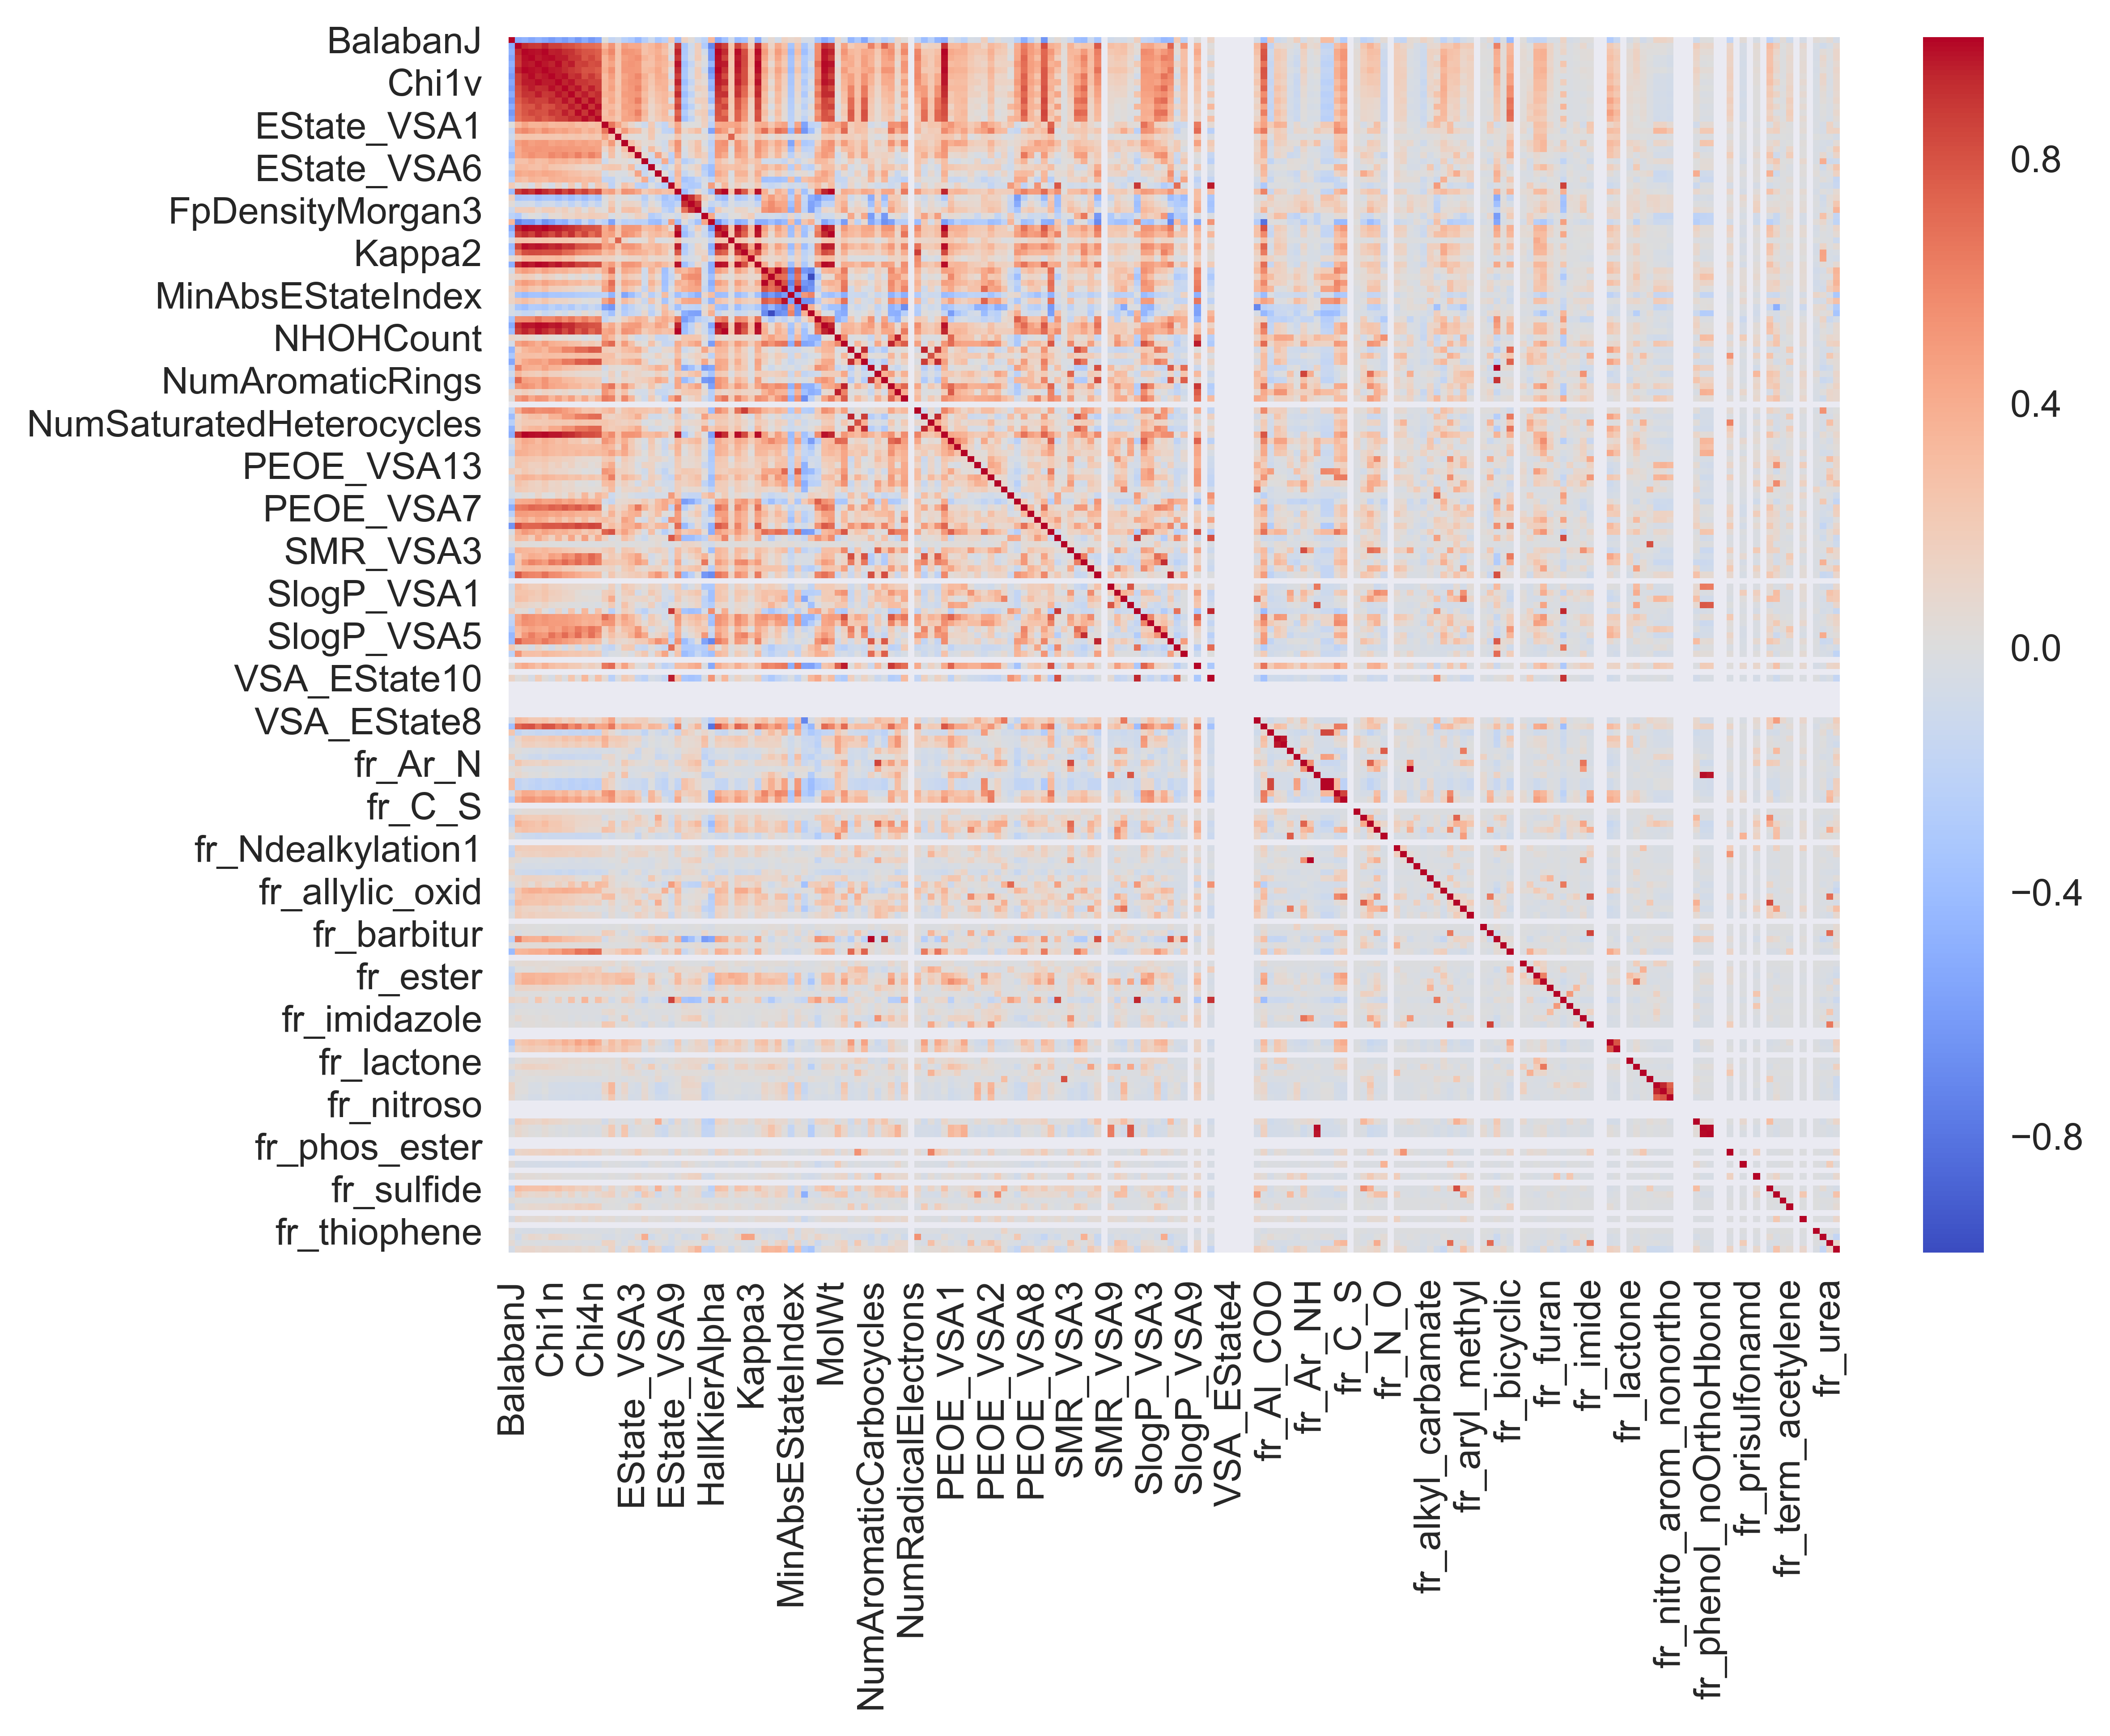

In [69]:
fig, ax = plt.subplots(figsize=(8,6), dpi=600)
sns.heatmap(dataset_clean.drop('MP_Kelvin', axis=1).corr(), cmap='coolwarm')

(597, 201)

In [22]:
# Get feature matrix and target variable
X = dataset_clean.drop('MP_Kelvin', axis=1)
y = dataset_clean[['MP_Kelvin']]

In [23]:
X.head()
y.head()

,MP_Kelvin
0,509.15
1,516.65
2,360.90
3,461.15
4,463.15


In [24]:
# Make a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Regression using all features

### Linear regression

In [62]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

Mean squared error: 7472802339.05
Variance score: -650195.90


### Decision trees

In [61]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
pred = dt_model.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

Mean squared error: 5746.33
Variance score: 0.50


# With feature selection

In [32]:
mreg = mutual_info_regression(X_train, y_train)

/Users/geraldcuder/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
fs_results = pd.DataFrame(data = mreg, index = feature_names, columns=['MI'])

In [44]:
# Order features in descending order based on the MI
fs_results.sort_values(by='MI', ascending=False)

,MI
HeavyAtomCount,0.408030
Chi1,0.379421
Chi0,0.371006
HeavyAtomMolWt,0.358702
BertzCT,0.357979
LabuteASA,0.355810
SlogP_VSA2,0.343624
NumValenceElectrons,0.335469
Chi0v,0.328244
MolWt,0.320266


# fuzija sirovih podataka i deskriptora

In [6]:
final_data=pd.concat([sirovi_podaci, mol_column, logp, molwt, balabanj, tpsa], axis=1)
final_data.head(4)

,cas,smiles,logs,mol,logp,molwt,balabanj,tpsa
0,60-35-5,CC(N)=O,1.58,<rdkit.Chem.rdchem.Mol object at 0x000001FE869...,-0.5084,59.068,2.803039,43.09
1,60-34-4,CNN,1.34,<rdkit.Chem.rdchem.Mol object at 0x000001FE869...,-0.9205,46.073,1.632993,38.05
2,64-19-7,CC(O)=O,1.22,<rdkit.Chem.rdchem.Mol object at 0x000001FE869...,0.0909,60.052,2.803039,37.30
3,123-75-1,C1CCCN1,1.15,<rdkit.Chem.rdchem.Mol object at 0x000001FE869...,0.3698,71.123,2.083333,12.03


#final_data.to_csv('data/solubility_all_data.csv')

# razdvajanje podataka na trening i test set

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(final_data, test_size=.2, random_state=42)
train_set.shape, test_set.shape

((1048, 8), (263, 8))

# vizualizacija odnosa varijabli

In [8]:
train_set[['logp','molwt','tpsa','balabanj','logs']].corr()

,logp,molwt,tpsa,balabanj,logs
logp,1.000000,0.451401,-0.513134,-0.162983,-0.840738
molwt,0.451401,1.000000,0.412144,-0.359005,-0.639202
tpsa,-0.513134,0.412144,1.000000,-0.069396,0.185571
balabanj,-0.162983,-0.359005,-0.069396,1.000000,0.232376
logs,-0.840738,-0.639202,0.185571,0.232376,1.000000


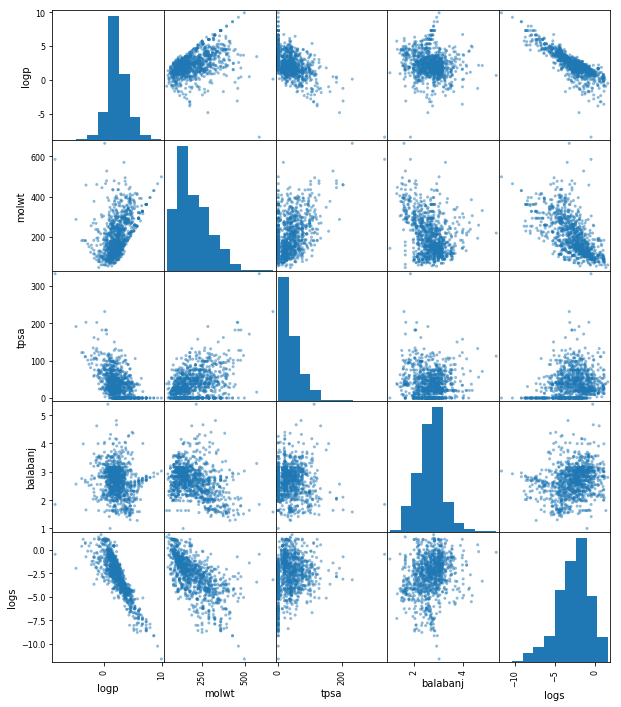

In [9]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(train_set[['logp','molwt','tpsa','balabanj','logs']], figsize=(10,12));

# izbor najbolje varijable

In [10]:
from sklearn.feature_selection import f_regression

In [11]:
help(f_regression)

Help on function f_regression in module sklearn.feature_selection.univariate_selection:

f_regression(X, y, center=True)
    Univariate linear regression tests.
    
    Linear model for testing the individual effect of each of many regressors.
    This is a scoring function to be used in a feature seletion procedure, not
    a free standing feature selection procedure.
    
    This is done in 2 steps:
    
    1. The correlation between each regressor and the target is computed,
       that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *
       std(y)).
    2. It is converted to an F score then to a p-value.
    
    For more on usage see the :ref:`User Guide <univariate_feature_selection>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}  shape = (n_samples, n_features)
        The set of regressors that will be tested sequentially.
    
    y : array of shape(n_samples).
        The data matrix
    
    center : True, bool,
        If true, X

In [12]:
featsel=f_regression(X=train_set[['logp','molwt','tpsa','balabanj']], y=train_set['logs'])
F_values=featsel[0]
P_values=featsel[1]
P_values

array([  5.79397574e-281,   1.94076230e-121,   1.42230093e-009,
         2.57225427e-014])

# treniranje modela

In [13]:
from sklearn.linear_model import LinearRegression as linreg

In [14]:
xtrain=np.array(train_set.logp)[:, np.newaxis]
ytrain=np.array(train_set.logs)
xtest=np.array(test_set.logp)[:, np.newaxis]
y_true=np.array(test_set.logs)

In [15]:
fitter=linreg().fit(X=xtrain, y=ytrain)
a=fitter.coef_
b=fitter.intercept_
a, b

(array([-0.95544944]), -0.55785964516979547)

# fitanje modela i predikcija

In [16]:
y_pred=fitter.predict(X=xtest)

# vizualizacija predikcije

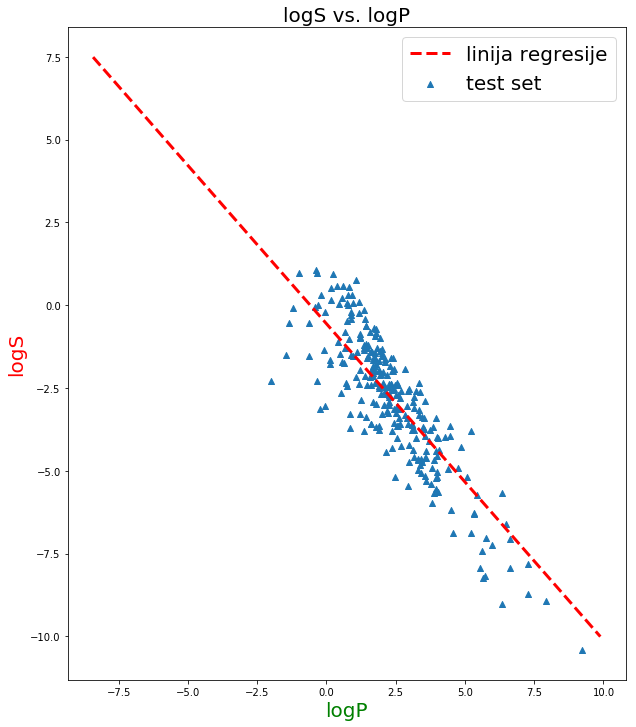

In [17]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(10,12))
#scatter plot
plt.scatter(x=test_set.logp, y=test_set.logs, marker='^', label='test set')
#regresijska linija
x_space=np.array([min(train_set.logp),max(train_set.logp)])
y_fit=x_space*a + b
plt.plot(x_space,y_fit, linestyle='--', c='r', lw=3, label="linija regresije")
#
plt.ylabel('logS', fontsize=20, color='red')
plt.xlabel('logP', fontsize=20, color='green')
plt.title('logS vs. logP', fontsize=20)
plt.legend(fontsize=20)

# kvaliteta predikcije

('MSE:', 1.071405731558055)

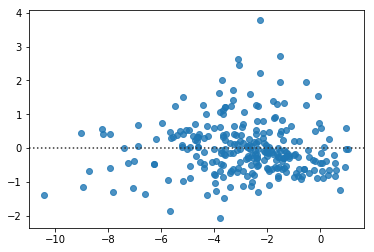

In [38]:
import seaborn as sns
sns.residplot(y_true,y_pred)
from sklearn.metrics import mean_squared_error as MSE
'MSE:',MSE(y_true, y_pred)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE8AD00FD0>]], dtype=object)

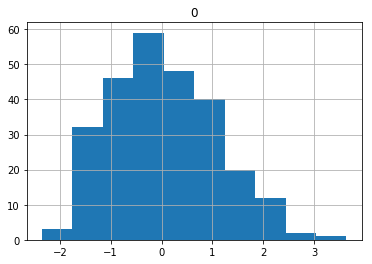

In [19]:
pd.DataFrame((y_pred-y_true)).hist()

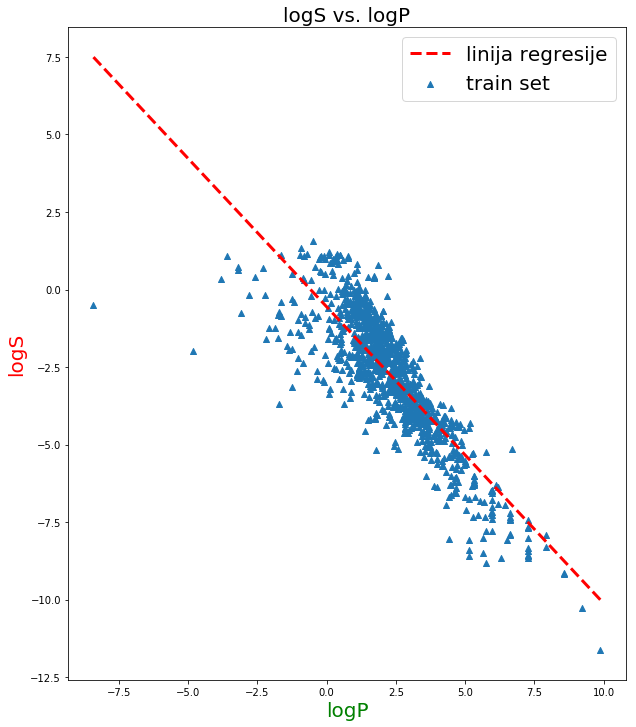

In [20]:
fig, ax =plt.subplots(figsize=(10,12))
#scatter plot
plt.scatter(x=train_set.logp, y=train_set.logs, marker='^', label='train set')
#regresijska linija
x_space=np.array([min(train_set.logp),max(train_set.logp)])
y_fit=x_space*fitter.coef_ + fitter.intercept_
ax.plot(x_space,y_fit, linestyle='--', c='r', lw=3, label="linija regresije")
#
ax.set_ylabel('logS', fontsize=20, color='red')
ax.set_xlabel('logP', fontsize=20, color='green')
ax.set_title('logS vs. logP', fontsize=20)
plt.legend(fontsize=20)

In [21]:
train_set[['logs','logp']].describe()

,logs,logp
count,1048.000000,1048.000000
mean,-2.714027,2.256705
std,2.031271,1.787395
min,-11.620000,-8.424200
25%,-3.960000,1.266550
50%,-2.435000,2.088900
75%,-1.320000,3.174225
max,1.580000,9.887600


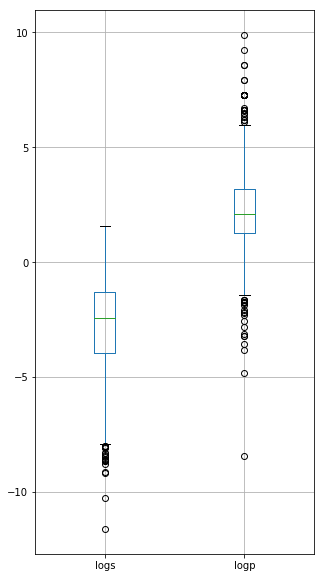

In [22]:
train_set[['logs','logp']].plot.box(figsize=(5,10), grid=True)

C:\Users\mlovric\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


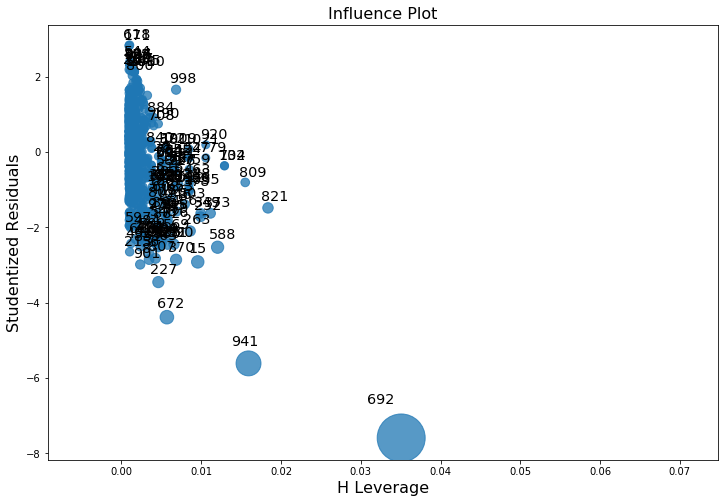

In [23]:
import statsmodels.api as sm
x_sm=sm.add_constant(xtrain)
model = sm.OLS(ytrain, x_sm)
fitted_model = model.fit()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fitted_model , alpha  = 0.05, ax=ax, criterion="cooks")

In [24]:
xtrain[941]

array([-4.8194])

In [25]:
xtrain[692]

array([-8.4242])

In [26]:
train_set[train_set.logp<-4.8][['smiles','logp']]

,smiles,logp
105,NCCC(C(NC2CC(C(C(C2OC3OC(C(C(C3O)N)O)CO)O)OC1O...,-8.4242
1056,OC1(C2(C(NC(NC2=O)=O)=O)O)C(NC(NC1=O)=O)=O,-4.8194


In [27]:
outlier1=train_set.smiles.loc[1056]
outlier2=train_set.smiles.loc[105]

In [28]:
o1_mol=Chem.MolFromSmiles(outlier1)
AllChem.Compute2DCoords(o1_mol)
print(Chem.MolToMolBlock(o1_mol))  


     RDKit          2D

 20 21  0  0  0  0  0  0  0  0999 V2000
   -0.1603   -1.1950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6637   -0.3494    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6637    0.3494    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1213   -1.0791    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5872   -1.3970    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.5955   -0.2864    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1379    1.1421    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.6719    1.4600    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2143    2.8884    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.0614   -0.6043    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5535   -1.8830    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.1603    1.1950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1213    1.0791    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5872    1.3970    0

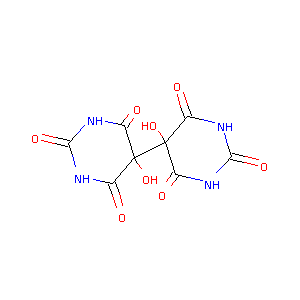

In [29]:
Draw.MolToImage(o1_mol)

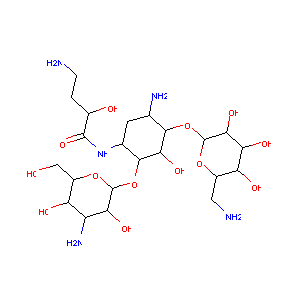

In [30]:
o2_mol=Chem.MolFromSmiles(outlier2)
AllChem.Compute2DCoords(o2_mol)
Draw.MolToImage(o2_mol)